Discrepancy Analysis of Charter Index Data from 1999 to 2016

The following code was written by Brian Lei for the project called 'Stratification through organizational identity: Do charter schools' ideologies reinforce social inequalities?' led by Jaren Haber at the University of California, Berkeley on July 10, 2018. The goal of the code is to analyze discrepancies in charter index data from 1999 to 2016 and across states in the U.S.


In [56]:
% matplotlib inline
import re
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# csv file needs to be in data_management/data folder
df_csch = pd.read_csv("data/pub_schools_merged_2015.csv", encoding = "latin1")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2871: DtypeWarning: Columns (0,2,3,5,7,9,10,11,12,13,17,18,19,20,21,25,26,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,343,344,345,346,347,348,349,350,352,353,354,355,356,359,360,361,362,363,364,365,366,367,368,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,389,391,392,394,395,397,398,400,401,403,404,406,407,409,410,412,413,415,416,418,419,421,422,423,424,426,428,429,431,433,434,436,438,439,441,442,443,445,449,451,452,453,457,458,459,460,461,463,465,467,473,474,475,477,483) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
#need 0.17
pd.__version__

'0.19.2'

In [59]:
# drop '98 column because of its lack of data
df_csch.drop(['CHARTR98'], axis = 1, inplace = True)
# filter out useful columns and make charter index variable names consistent
df_csch = df_csch.filter(regex=(r'SCHNAM16|NCESSCH|ADDRESS.*|CHARTR.*|CHARTER_TEXT.*|LSTATE16'))
new_names = {'CHARTER_TEXT':'CHARTR14', 'CHARTER_TEXT15':'CHARTR15', 'CHARTER_TEXT16':'CHARTR16'}
df_csch.rename(columns=new_names, inplace=True)
# reorder columns from '99 to'16
cols = list(df_csch)
cols.remove('CHARTR14')
cols.insert(16,'CHARTR14')
df_csch = df_csch[cols]

In [60]:
# use regex to get charter index columns
p = re.compile('CHARTR.*|CHARTER_TEXT.*')
charter_indices = list(filter(p.match,list(df_csch)))

In [61]:
'''
Chartr14-16 have 'yes' and 'no' for charter status and are changed to 1s and 2s to be consistent with the chartr99-13
They also have mixed value types. Since '1.0' != 1 or '1' != '1.0' this could be an issue for determining discrepancy between consecutive
years using == comparison
'''
df_csch['CHARTR10'].value_counts()
di = {"Yes": 1, "No" : 2}
df_csch[['CHARTR14','CHARTR15','CHARTR16']]=df_csch[['CHARTR14','CHARTR15','CHARTR16']].replace(di)

In [62]:
# turned to 1s and 2s
df_csch['CHARTR14'].value_counts()

2                 88182
1                  7288
Not Applicable     6931
Name: CHARTR14, dtype: int64

In [63]:
# turn all data to numeric using to_numeric, 'coerce' forces changes despite mixed types but turns non convertible values to NaN
df_csch[charter_indices] = df_csch[charter_indices].apply(pd.to_numeric,errors = 'coerce')
df_csch[charter_indices] = df_csch[charter_indices].fillna(0) #turns NaN to 0 to allow for comparison(since NaN != NaN)
df_csch['CHARTR10'].value_counts()

2.0    85740
0.0    45354
1.0     5731
Name: CHARTR10, dtype: int64

In [64]:
df_csch['CHARTR14'].value_counts()

2.0    88182
0.0    41355
1.0     7288
Name: CHARTR14, dtype: int64

In [65]:
df_csch[charter_indices] # what the data looks like now

,CHARTR99,CHARTR00,CHARTR01,CHARTR02,CHARTR03,CHARTR04,CHARTR05,CHARTR06,CHARTR07,CHARTR08,CHARTR09,CHARTR10,CHARTR11,CHARTR12,CHARTR13,CHARTR14,CHARTR15,CHARTR16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
1,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
3,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
4,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
6,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
7,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
8,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
9,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0


In [66]:
# create 'info' and 'num_charter' columns which tell us the number of years where there is charter index data ('yes or 'no') and
# the number of years where a school is positively identified as charter respectively
df_csch['index_sum'] = df_csch[charter_indices].sum(axis=1)
mask = df_csch[charter_indices] == 0 # could be useful for determining years with charter data

df_csch['info'] = 18 - mask.sum(axis=1)
df_csch['num_charter'] = 2*df_csch['info'] - df_csch['index_sum'] # works because 'yes' is 1 and 'no' is 2 and no data is 0

In [67]:
# create a column 'charter_history' that could be useful for analayzing discrepancies in charter history for non-consecutive years
l = df_csch[charter_indices].values.tolist() # full charter history in  nested list
l = [[b for b in a if b != 0] for a in l] # filter out 0s(years with no data)
df_csch['charter_history'] = pd.Series(l, index=df_csch.index)

In [68]:
df_csch['charter_history'] # charter_history gives history of all yes or no (ignores years with 'm'/'n' values)

0                        [2.0, 2.0, 2.0]
1         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
2                        [2.0, 2.0, 2.0]
3         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
4         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
5                        [2.0, 2.0, 2.0]
6         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
7         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
8         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
9         [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
10        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
11                       [2.0, 2.0, 2.0]
12        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
13        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
14        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
15        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
16             [2.0, 2.0, 2.0, 2.0, 2.0]
17        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
18                       [2.0, 2.0, 2.0]
19        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
20        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
21        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
22        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
23        [2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
24              

In [69]:
df_csch['info'].describe()

count    136825.000000
mean         12.014493
std           6.528556
min           0.000000
25%           6.000000
50%          15.000000
75%          18.000000
max          18.000000
Name: info, dtype: float64

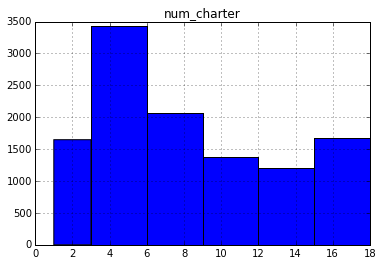

In [70]:
# bins [1,3), [3,6),....,[12,15), [15,18] represent number of years positively identified as charter
# height represents number of schools
df_csch.hist(column='num_charter', bins = [1,3,6,9,12,15,18])
plt.show()

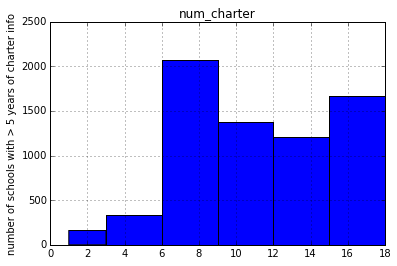

In [71]:
# same histogram using only schools with charter info(not 'missing' or 'n/a') for > 5 years(5 is arbitrary, could be any number) 
df_csch[df_csch['info'] > 5].hist(column='num_charter', bins = [1,3,6,9,12,15,18])
plt.ylabel('number of schools with > 5 years of charter info')
plt.show()

In [72]:
'''
Create '(yr#)type', and 'yr#' columns are discrepancy type (with following year) and discrepancy indicator(true meaning there is a discrepancy)
False(type 1) corresponds to n/a / missing data -> yes or no(or vice versa) 
True(type 2) corresponds to yes -> no(or vice versa) 
'''
c = 'CHARTR'
disc_ind = []
disc_type = []
for x in charter_indices:
    year = int(x[-2:])
    if year != 16:
        disc_ind.append(str(year))
        disc_type.append(str(year) + 'type')
        nxt_yr = c + ('%02d' % (year + 1))[-2:]
        df_csch[str(year)] = ~(df_csch[c + x[-2:]] == df_csch[nxt_yr])
        df_csch[str(year) + 'type'] = df_csch[str(year)] & (df_csch[c + x[-2:]] != 0) & (df_csch[nxt_yr] != 0)

In [73]:
# add column for number of discrepancies and number of each type of discrepancy 
df_csch['num_dis'] = df_csch[disc_ind].sum(axis = 1)
df_csch['type2_dis'] = df_csch[disc_type].sum(axis = 1)
df_csch['type1_dis'] = df_csch['num_dis'] - df_csch['type2_dis']

In [74]:
# type2 distribution
df_csch['type2_dis'].value_counts()

0    135457
1       963
2       360
3        38
4         6
5         1
Name: type2_dis, dtype: int64

In [75]:
df_filtered = df_csch[df_csch['num_dis'] > 0] # filter out schools without any discrepancies
len(df_filtered) # number of schools with discrepancies

76338

In [76]:
df_filtered['num_dis'].value_counts() # distribution of both types of discrepancies

1    50084
2    20418
3     5391
4      431
5       12
6        2
Name: num_dis, dtype: int64

In [77]:
dis_graph = df_filtered[disc_ind].sum(axis = 0) # number of discrepancies for each year
type2_graph = df_filtered[disc_type].sum(axis = 0) # same except counting only type 2 discrepancies
type2_graph.index = type2_graph.index.str.replace('type', '') # renaming index to be the same as dis_graph (99 - 15)

Results/Graphs

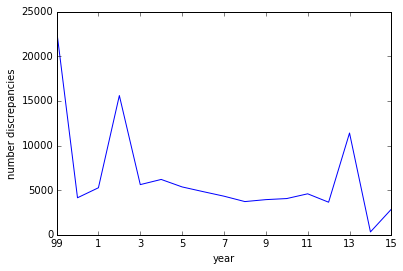

In [78]:
# number of discrepancies over time
dis_graph.plot.line()
plt.ylabel('number discrepancies')
plt.xlabel('year')
plt.show()

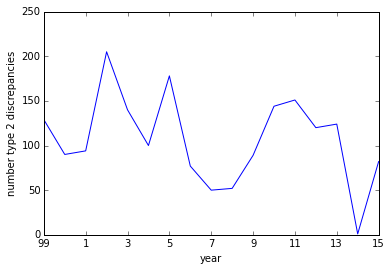

In [79]:
# number of type2 discrepancies over time
type2_graph.plot.line()
plt.ylabel('number type 2 discrepancies')
plt.xlabel('year')
plt.show()

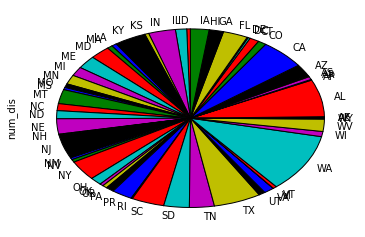

In [80]:
# pie plot of number of discrepancies by state
df_filtered.groupby('LSTATE16')['num_dis'].sum().plot(kind = 'pie')
plt.show()

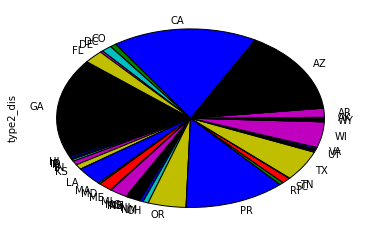

In [81]:
# pie plot of number of type2 discrepancies by state
df_filtered.groupby('LSTATE16')['type2_dis'].sum().plot(kind = 'pie')
plt.show()

Conclusions*

Looking solely on discrepancies in charter status between consecutive years, we see sizeable spikes between 1999-2000, 2002-2003, and 2013-2014 attributed to change from m/n status to 'yes' or 'no'(or vice versa). Specifically, looking at type2 changes from 'yes' to 'no'(or vice versa) we see possible spikes in status changes around 2002, 2005, and 2011. Discrepancies from 2014-2016 were generally low. The 4 states with the largest discrepancies were WA, AL, CA, and TX (mostly due to type 1 discrepancies). The 4 states with a disproportionate number of type2 discrepancies were CA, GA, PR, and AZ. The results should also be taken with a grain of salt because they are not isolated from variation in availability of data from state to state.

*Discrepancies were determined between pairs of consecutive years only. A better analysis could involve looking at the "charter_history" column I created containing a list of charter statuses when the information was available, looking for sizeable streaks of 'yes' or 'no' charter status, and looking for the years the streak ended.